In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/logs/20250505_155033_TransformerClassifier.csv')
df = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/logs/20250505_211114_TransformerClassifier.csv')

<Axes: xlabel='epoch', ylabel='avg_val_loss'>

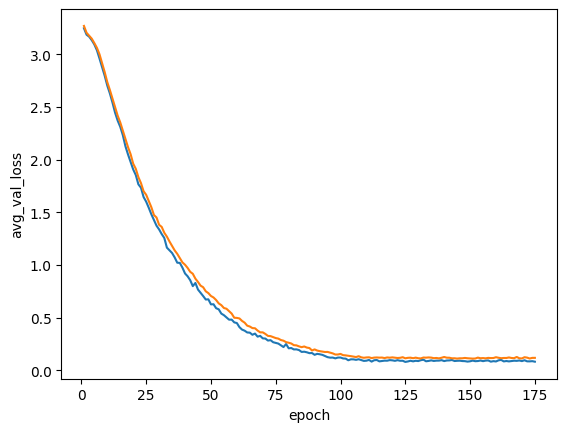

In [4]:
sns.lineplot(y='avg_val_loss', x='epoch', data=df)
sns.lineplot(y='avg_train_loss', x='epoch', data=df)

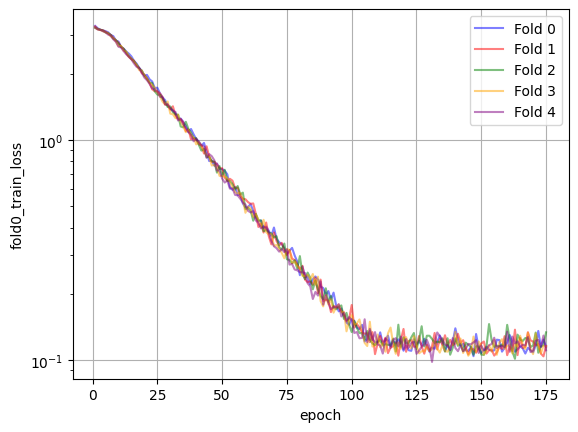

In [7]:
sns.lineplot(y='fold0_train_loss', x='epoch', data=df, color='blue', alpha=0.5, label='Fold 0')
sns.lineplot(y='fold1_train_loss', x='epoch', data=df, color='red', alpha=0.5, label='Fold 1')
sns.lineplot(y='fold2_train_loss', x='epoch', data=df, color='green', alpha=0.5, label='Fold 2')
sns.lineplot(y='fold3_train_loss', x='epoch', data=df, color='orange', alpha=0.5, label='Fold 3')
sns.lineplot(y='fold4_train_loss', x='epoch', data=df, color='purple', alpha=0.5, label='Fold 4')
plt.yscale('log')
plt.grid(True)
plt.legend()

<Axes: xlabel='epoch', ylabel='fold0_val_loss'>

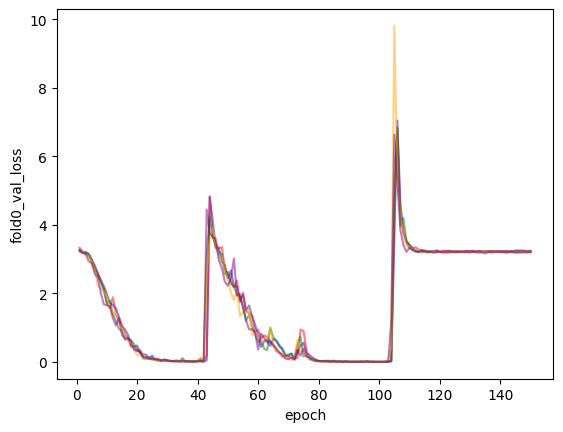

In [15]:
sns.lineplot(y='fold0_val_loss', x='epoch', data=df, color='blue', alpha=0.5)
sns.lineplot(y='fold1_val_loss', x='epoch', data=df, color='red', alpha=0.5)
sns.lineplot(y='fold2_val_loss', x='epoch', data=df, color='green', alpha=0.5)
sns.lineplot(y='fold3_val_loss', x='epoch', data=df, color='orange', alpha=0.5)
sns.lineplot(y='fold4_val_loss', x='epoch', data=df, color='purple', alpha=0.5)


In [7]:
import sys
sys.path.append('..')
from dataset.frame_sampling import multiple_sampling_without_replacement_uniform

In [8]:
import numpy as np
from typing import Dict, Any, List


# Test different video lengths
num_frames_list = [20, 30, 40, 50, 60, 100]

# Test different parameter configurations
test_configs = [
    {
        'name': 'Basic sampling (no replacement)',
        'params': {
            'frames_per_sample': 12,
            'replacement_rate': 0.0,
            'include_remaining': False
        }
    },
    {
        'name': 'With replacement (20%)',
        'params': {
            'frames_per_sample': 12,
            'replacement_rate': 0.2,
            'include_remaining': False
        }
    },
    {
        'name': 'With remaining frames',
        'params': {
            'frames_per_sample': 12,
            'replacement_rate': 0.0,
            'include_remaining': True
        }
    }
]

# Run tests and display results
for config in test_configs:
    print(f"\n{config['name']}:")
    print("-" * 50)
    print(f"{'Num Frames':<12} {'Num Samples':<12} {'Sample Details'}")
    print("-" * 50)
    
    for num_frames in num_frames_list:
        samples = multiple_sampling_without_replacement_uniform(num_frames, config['params'])
        
        # Calculate remaining frames after main sampling
        frames_used = set()
        for sample in samples:
            frames_used.update(sample)
        remaining = num_frames - len(frames_used)
        
        print(f"{num_frames:<12} {len(samples):<12} (Remaining frames: {remaining})")

# Detailed analysis of a specific case
def analyze_samples(num_frames: int, params: Dict[str, Any]) -> None:
    samples = multiple_sampling_without_replacement_uniform(num_frames, params)
    
    print(f"\nDetailed analysis for {num_frames} frames:")
    print(f"Number of samples: {len(samples)}")
    
    for i, sample in enumerate(samples):
        print(f"\nSample {i+1}:")
        print(f"  Frames: {sample}")
        print(f"  Sample size: {len(sample)}")
        if i > 0:
            # Check overlap with previous sample
            overlap = set(sample) & set(samples[i-1])
            print(f"  Overlap with previous: {sorted(overlap)}")
    
    # Check frame usage
    all_used_frames = set()
    for sample in samples:
        all_used_frames.update(sample)
    
    unused_frames = set(range(num_frames)) - all_used_frames
    print(f"\nUnused frames: {sorted(unused_frames)}")
    print(f"Total frames used: {len(all_used_frames)}/{num_frames}")

# Analyze a specific case in detail
specific_params = {
    'frames_per_sample': 12,
    'replacement_rate': 0.2,
    'include_remaining': True
}
analyze_samples(30, specific_params)


Basic sampling (no replacement):
--------------------------------------------------
Num Frames   Num Samples  Sample Details
--------------------------------------------------
20           1            (Remaining frames: 8)
30           2            (Remaining frames: 6)
40           3            (Remaining frames: 4)
50           4            (Remaining frames: 2)
60           5            (Remaining frames: 0)
100          8            (Remaining frames: 4)

With replacement (20%):
--------------------------------------------------
Num Frames   Num Samples  Sample Details
--------------------------------------------------
20           2            (Remaining frames: 0)
30           3            (Remaining frames: 1)
40           4            (Remaining frames: 1)
50           5            (Remaining frames: 1)
60           6            (Remaining frames: 1)
100          10           (Remaining frames: 0)

With remaining frames:
--------------------------------------------------
Num 